<a href="https://colab.research.google.com/github/fedechaves/nw-bc/blob/main/day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.listdir('/content/drive/MyDrive/nw_bc/')

['nw-version-reds.xlsx', 'Copia de nw-version-reds.xlsx', 'mats']

In [3]:
pd.__version__

'1.5.3'

In [4]:
df = pd.read_csv('/content/drive/MyDrive/nw_bc/mats/2023-nwbc-reds.csv')

In [5]:
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,batter,pitcher,events,description,...,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,attack_zone,swing,batter_name
0,FF,2022-10-05,93.8,2.39,5.44,"Hughes, Brandon",605244,676714,field_out,hit_into_play,...,2,15,Standard,Standard,133.0,0.0,-0.083,heart,0,"garcia, aramis"
1,FF,2022-10-05,93.3,2.30,5.51,"Hughes, Brandon",605244,676714,NaN,ball,...,2,15,Standard,Standard,132.0,0.0,0.014,shadow,0,"garcia, aramis"
2,SL,2022-10-05,84.3,2.45,5.21,"Hughes, Brandon",605244,676714,NaN,ball,...,2,15,Standard,Standard,216.0,0.0,0.011,waste,0,"garcia, aramis"
3,FF,2022-10-05,93.8,2.32,5.48,"Hughes, Brandon",605244,676714,NaN,called_strike,...,2,15,Standard,Standard,133.0,0.0,-0.023,heart,0,"garcia, aramis"
4,FF,2022-10-05,94.1,2.34,5.54,"Hughes, Brandon",605244,676714,NaN,swinging_strike,...,2,15,Standard,Standard,133.0,0.0,-0.017,heart,0,"garcia, aramis"


In [6]:
df.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'pitcher_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estim

In [7]:
df['home_score']

0        2
1        2
2        2
3        2
4        2
        ..
49033    0
49034    0
49035    0
49036    0
49037    0
Name: home_score, Length: 49038, dtype: int64

In [8]:
df['total_score'] = df['home_score'] + df['away_score']

In [9]:
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,batter,pitcher,events,description,...,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,attack_zone,swing,batter_name,total_score
0,FF,2022-10-05,93.8,2.39,5.44,"Hughes, Brandon",605244,676714,field_out,hit_into_play,...,15,Standard,Standard,133.0,0.0,-0.083,heart,0,"garcia, aramis",17
1,FF,2022-10-05,93.3,2.30,5.51,"Hughes, Brandon",605244,676714,NaN,ball,...,15,Standard,Standard,132.0,0.0,0.014,shadow,0,"garcia, aramis",17
2,SL,2022-10-05,84.3,2.45,5.21,"Hughes, Brandon",605244,676714,NaN,ball,...,15,Standard,Standard,216.0,0.0,0.011,waste,0,"garcia, aramis",17
3,FF,2022-10-05,93.8,2.32,5.48,"Hughes, Brandon",605244,676714,NaN,called_strike,...,15,Standard,Standard,133.0,0.0,-0.023,heart,0,"garcia, aramis",17
4,FF,2022-10-05,94.1,2.34,5.54,"Hughes, Brandon",605244,676714,NaN,swinging_strike,...,15,Standard,Standard,133.0,0.0,-0.017,heart,0,"garcia, aramis",17


In [10]:
df['description'].unique()

array(['hit_into_play', 'ball', 'called_strike', 'swinging_strike',
       'foul', 'blocked_ball', 'swinging_strike_blocked', 'hit_by_pitch',
       'foul_tip', 'foul_bunt', 'missed_bunt', 'bunt_foul_tip',
       'pitchout'], dtype=object)

In [11]:
strike_events = ['called_strike', 'swinging_strike',
       'foul', 'swinging_strike_blocked',
       'foul_tip', 'foul_bunt', 'missed_bunt', 'bunt_foul_tip'
       ]

In [12]:
strike_events

['called_strike',
 'swinging_strike',
 'foul',
 'swinging_strike_blocked',
 'foul_tip',
 'foul_bunt',
 'missed_bunt',
 'bunt_foul_tip']

In [13]:
#df['is_strike'] = df['description'].apply(lambda x: 1 if any(substring in x for substring in ['strike', 'foul', 'missed_bunt']) else 0)
#=IF(OR(ISNUMBER(FIND("strike", J2)), ISNUMBER(FIND("foul", J2)), ISNUMBER(FIND("missed_bunt", J2)))=TRUE, 1, 0)
#df['NewColumn'] = (df['J'].str.contains('strike|foul|missed_bunt')).astype(int)
df.loc[df['description'].isin(strike_events)]

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,batter,pitcher,events,description,...,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,attack_zone,swing,batter_name,total_score
3,FF,2022-10-05,93.8,2.32,5.48,"Hughes, Brandon",605244,676714,NaN,called_strike,...,15,Standard,Standard,133.0,0.000,-0.023,heart,0,"garcia, aramis",17
4,FF,2022-10-05,94.1,2.34,5.54,"Hughes, Brandon",605244,676714,NaN,swinging_strike,...,15,Standard,Standard,133.0,0.000,-0.017,heart,0,"garcia, aramis",17
6,FF,2022-10-05,94.5,2.25,5.47,"Hughes, Brandon",608703,676714,NaN,called_strike,...,15,Standard,Standard,124.0,0.000,-0.024,shadow,0,"reynolds, matt",17
9,SI,2022-10-05,93.4,2.36,5.41,"Hughes, Brandon",641584,676714,NaN,foul,...,15,Standard,Standard,132.0,0.000,-0.066,chase,0,"fraley, jake",17
12,FF,2022-10-05,92.7,2.45,5.40,"Hughes, Brandon",641584,676714,NaN,called_strike,...,15,Standard,Standard,130.0,0.000,-0.034,heart,0,"fraley, jake",17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49033,NaN,2022-03-31,NaN,NaN,NaN,"Greene, Hunter",673357,668881,NaN,foul,...,0,NaN,NaN,NaN,0.000,NaN,waste,0,"robert, luis",0
49034,NaN,2022-03-31,NaN,NaN,NaN,"Greene, Hunter",673357,668881,NaN,swinging_strike,...,0,NaN,NaN,NaN,0.000,NaN,waste,0,"robert, luis",0
49035,NaN,2022-03-31,NaN,NaN,NaN,"Greene, Hunter",641313,668881,strikeout,foul_tip,...,0,NaN,NaN,NaN,0.022,NaN,waste,0,"anderson, tim",0
49036,NaN,2022-03-31,NaN,NaN,NaN,"Greene, Hunter",641313,668881,NaN,called_strike,...,0,NaN,NaN,NaN,0.000,NaN,waste,0,"anderson, tim",0


In [14]:
df['is_strike'] = 0
df.loc[df['description'].isin(strike_events), 'is_strike'] = 1

In [15]:
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,batter,pitcher,events,description,...,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,attack_zone,swing,batter_name,total_score,is_strike
0,FF,2022-10-05,93.8,2.39,5.44,"Hughes, Brandon",605244,676714,field_out,hit_into_play,...,Standard,Standard,133.0,0.0,-0.083,heart,0,"garcia, aramis",17,0
1,FF,2022-10-05,93.3,2.30,5.51,"Hughes, Brandon",605244,676714,NaN,ball,...,Standard,Standard,132.0,0.0,0.014,shadow,0,"garcia, aramis",17,0
2,SL,2022-10-05,84.3,2.45,5.21,"Hughes, Brandon",605244,676714,NaN,ball,...,Standard,Standard,216.0,0.0,0.011,waste,0,"garcia, aramis",17,0
3,FF,2022-10-05,93.8,2.32,5.48,"Hughes, Brandon",605244,676714,NaN,called_strike,...,Standard,Standard,133.0,0.0,-0.023,heart,0,"garcia, aramis",17,1
4,FF,2022-10-05,94.1,2.34,5.54,"Hughes, Brandon",605244,676714,NaN,swinging_strike,...,Standard,Standard,133.0,0.0,-0.017,heart,0,"garcia, aramis",17,1


#homework assignment
1. use the strikes column to find whre there are 2 strikes and make a new column indicating wether the pitch was thrown in 2 strikes situation. name this 'is_2_strikes'

2. use the 'release_speed' column to find when a pitch is thrown greather than 94 mph (the column is in mph already) name this `is_high_velo`

3. use the description column  AND the attack_zone column to indicate when a pitch is thrown for a called or swinging strike (not a foul) in the "heart" attack zone (hint: this requires two conditional statements! maybe google or ask for help in discord)

In [16]:
df['strikes']

0        2
1        2
2        2
3        1
4        0
        ..
49033    1
49034    0
49035    2
49036    1
49037    0
Name: strikes, Length: 49038, dtype: int64

In [17]:

df['is_2_strikes'] = 0
df.loc[df['strikes'] >= 2, 'is_2_strikes'] = 1

In [18]:
df['is_2_strikes']

0        1
1        1
2        1
3        0
4        0
        ..
49033    0
49034    0
49035    1
49036    0
49037    0
Name: is_2_strikes, Length: 49038, dtype: int64

In [19]:
df['is_high_velo'] = 0
df.loc[df['release_speed'] > 94, 'is_high_velo'] = 1

In [20]:
df['description'].unique()


array(['hit_into_play', 'ball', 'called_strike', 'swinging_strike',
       'foul', 'blocked_ball', 'swinging_strike_blocked', 'hit_by_pitch',
       'foul_tip', 'foul_bunt', 'missed_bunt', 'bunt_foul_tip',
       'pitchout'], dtype=object)

In [21]:
df['strike_heart'] = 0
df.loc[(df['description'].isin(['called_strike','swinging_strike'])) & (df['attack_zone'] == 'heart'), 'strike_heart'] = 1

In [22]:
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,batter,pitcher,events,description,...,delta_home_win_exp,delta_run_exp,attack_zone,swing,batter_name,total_score,is_strike,is_2_strikes,is_high_velo,strike_heart
0,FF,2022-10-05,93.8,2.39,5.44,"Hughes, Brandon",605244,676714,field_out,hit_into_play,...,0.0,-0.083,heart,0,"garcia, aramis",17,0,1,0,0
1,FF,2022-10-05,93.3,2.30,5.51,"Hughes, Brandon",605244,676714,NaN,ball,...,0.0,0.014,shadow,0,"garcia, aramis",17,0,1,0,0
2,SL,2022-10-05,84.3,2.45,5.21,"Hughes, Brandon",605244,676714,NaN,ball,...,0.0,0.011,waste,0,"garcia, aramis",17,0,1,0,0
3,FF,2022-10-05,93.8,2.32,5.48,"Hughes, Brandon",605244,676714,NaN,called_strike,...,0.0,-0.023,heart,0,"garcia, aramis",17,1,0,0,1
4,FF,2022-10-05,94.1,2.34,5.54,"Hughes, Brandon",605244,676714,NaN,swinging_strike,...,0.0,-0.017,heart,0,"garcia, aramis",17,1,0,1,1


# DAY 2

In [23]:
df['is_reds_pitcher'] = 0

In [24]:
df.loc[ ((df['home_team'] == 'CIN') &
         (df['inning_topbot'] == 'Top')) |
        ((df['home_team'] == 'CIN') &
         (df['inning_topbot'] == 'Bot')),
        'is_reds_pitcher'] = 1
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,batter,pitcher,events,description,...,delta_run_exp,attack_zone,swing,batter_name,total_score,is_strike,is_2_strikes,is_high_velo,strike_heart,is_reds_pitcher
0,FF,2022-10-05,93.8,2.39,5.44,"Hughes, Brandon",605244,676714,field_out,hit_into_play,...,-0.083,heart,0,"garcia, aramis",17,0,1,0,0,1
1,FF,2022-10-05,93.3,2.30,5.51,"Hughes, Brandon",605244,676714,NaN,ball,...,0.014,shadow,0,"garcia, aramis",17,0,1,0,0,1
2,SL,2022-10-05,84.3,2.45,5.21,"Hughes, Brandon",605244,676714,NaN,ball,...,0.011,waste,0,"garcia, aramis",17,0,1,0,0,1
3,FF,2022-10-05,93.8,2.32,5.48,"Hughes, Brandon",605244,676714,NaN,called_strike,...,-0.023,heart,0,"garcia, aramis",17,1,0,0,1,1
4,FF,2022-10-05,94.1,2.34,5.54,"Hughes, Brandon",605244,676714,NaN,swinging_strike,...,-0.017,heart,0,"garcia, aramis",17,1,0,1,1,1


In [25]:
df1 = df.loc[df['is_reds_pitcher'] ==1, ['pitcher_name', 'pitch_name', 'is_strike']].groupby(['pitcher_name', 'pitch_name'], as_index = False).mean()

In [26]:
df1

,pitcher_name,pitch_name,is_strike
0,"Adam, Jason",4-Seam Fastball,0.500000
1,"Adam, Jason",Changeup,0.800000
2,"Adam, Jason",Sweeper,0.444444
3,"Adon, Joan",4-Seam Fastball,0.410959
4,"Adon, Joan",Changeup,0.250000
...,...,...,...
970,"Yajure, Miguel",Cutter,0.142857
971,"Zeuch, T.J.",Changeup,0.000000
972,"Zeuch, T.J.",Cutter,0.375000
973,"Zeuch, T.J.",Sinker,0.416667


# day 03

In [27]:
df2 = df.loc[df['is_reds_pitcher'] ==1, ['pitcher_name', 'pitch_name', 'is_strike']].groupby(['pitcher_name', 'pitch_name'], as_index = False).count()

In [28]:
df2

,pitcher_name,pitch_name,is_strike
0,"Adam, Jason",4-Seam Fastball,6
1,"Adam, Jason",Changeup,10
2,"Adam, Jason",Sweeper,9
3,"Adon, Joan",4-Seam Fastball,73
4,"Adon, Joan",Changeup,4
...,...,...,...
970,"Yajure, Miguel",Cutter,7
971,"Zeuch, T.J.",Changeup,6
972,"Zeuch, T.J.",Cutter,8
973,"Zeuch, T.J.",Sinker,36


In [29]:
df2 = df2.rename(columns = {'is_strike': 'count'})

In [30]:
df2

,pitcher_name,pitch_name,count
0,"Adam, Jason",4-Seam Fastball,6
1,"Adam, Jason",Changeup,10
2,"Adam, Jason",Sweeper,9
3,"Adon, Joan",4-Seam Fastball,73
4,"Adon, Joan",Changeup,4
...,...,...,...
970,"Yajure, Miguel",Cutter,7
971,"Zeuch, T.J.",Changeup,6
972,"Zeuch, T.J.",Cutter,8
973,"Zeuch, T.J.",Sinker,36


In [31]:
df1.rename(columns = {'is_strike': 'avg'}).head()

,pitcher_name,pitch_name,avg
0,"Adam, Jason",4-Seam Fastball,0.500000
1,"Adam, Jason",Changeup,0.800000
2,"Adam, Jason",Sweeper,0.444444
3,"Adon, Joan",4-Seam Fastball,0.410959
4,"Adon, Joan",Changeup,0.250000


In [32]:
df1 = df1.rename(columns = {'is_strike': 'avg'})
df1

,pitcher_name,pitch_name,avg
0,"Adam, Jason",4-Seam Fastball,0.500000
1,"Adam, Jason",Changeup,0.800000
2,"Adam, Jason",Sweeper,0.444444
3,"Adon, Joan",4-Seam Fastball,0.410959
4,"Adon, Joan",Changeup,0.250000
...,...,...,...
970,"Yajure, Miguel",Cutter,0.142857
971,"Zeuch, T.J.",Changeup,0.000000
972,"Zeuch, T.J.",Cutter,0.375000
973,"Zeuch, T.J.",Sinker,0.416667


In [33]:
df3 = df1.merge(df2, on=['pitcher_name', 'pitch_name'])

In [34]:
df3

,pitcher_name,pitch_name,avg,count
0,"Adam, Jason",4-Seam Fastball,0.500000,6
1,"Adam, Jason",Changeup,0.800000,10
2,"Adam, Jason",Sweeper,0.444444,9
3,"Adon, Joan",4-Seam Fastball,0.410959,73
4,"Adon, Joan",Changeup,0.250000,4
...,...,...,...,...
970,"Yajure, Miguel",Cutter,0.142857,7
971,"Zeuch, T.J.",Changeup,0.000000,6
972,"Zeuch, T.J.",Cutter,0.375000,8
973,"Zeuch, T.J.",Sinker,0.416667,36


In [50]:
df3

,pitcher_name,pitch_name,avg,count
0,"Adam, Jason",4-Seam Fastball,0.500000,6
1,"Adam, Jason",Changeup,0.800000,10
2,"Adam, Jason",Sweeper,0.444444,9
3,"Adon, Joan",4-Seam Fastball,0.410959,73
4,"Adon, Joan",Changeup,0.250000,4
...,...,...,...,...
970,"Yajure, Miguel",Cutter,0.142857,7
971,"Zeuch, T.J.",Changeup,0.000000,6
972,"Zeuch, T.J.",Cutter,0.375000,8
973,"Zeuch, T.J.",Sinker,0.416667,36


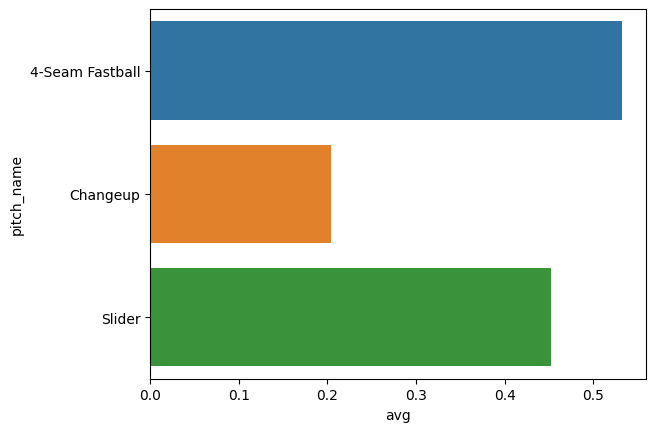

In [52]:
pitcher_name = 'Greene, Hunter'
df_plt = df3.loc[df3['pitcher_name']==pitcher_name]
sns.barplot(data=df_plt,x='avg',y='pitch_name')
plt.show()

In [54]:
df_plt

,pitcher_name,pitch_name,avg,count
366,"Greene, Hunter",4-Seam Fastball,0.532743,565
367,"Greene, Hunter",Changeup,0.203704,54
368,"Greene, Hunter",Slider,0.451691,414


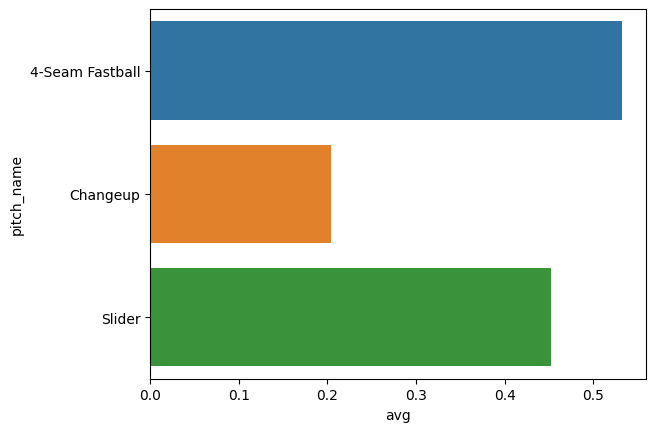

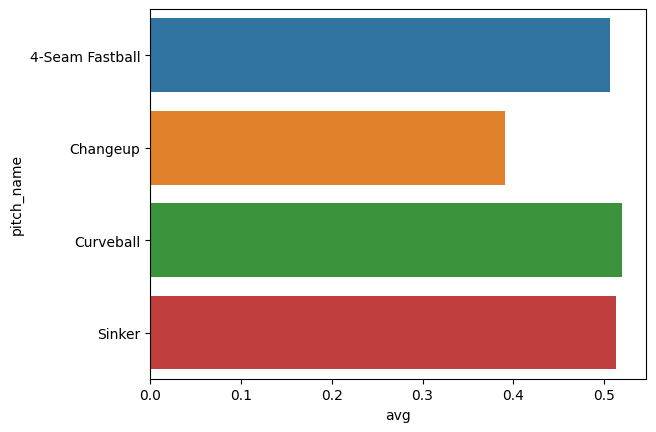

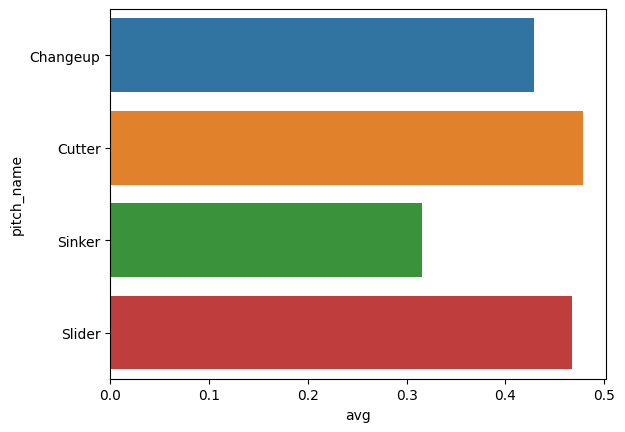

In [55]:
pitcher_name = 'Greene, Hunter'
df_plt = df3.loc[df3['pitcher_name']==pitcher_name]
sns.barplot(data=df_plt,x='avg',y='pitch_name')
plt.show()

pitcher_name = 'Lodolo, Nick'
df_plt = df3.loc[df3['pitcher_name']==pitcher_name]
sns.barplot(data=df_plt,x='avg',y='pitch_name')
plt.show()

pitcher_name = 'Ashcraft, Graham'
df_plt = df3.loc[df3['pitcher_name']==pitcher_name]
sns.barplot(data=df_plt,x='avg',y='pitch_name')
plt.show()